In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cp "/content/drive/My Drive/Colab Notebooks/6_image_data.zip" "/content/"

In [6]:
!cp "/content/drive/My Drive/Colab Notebooks/6_BlueBlock_images.zip" "/content/"

In [7]:
!cp "/content/drive/My Drive/Colab Notebooks/08_image_data.zip" "/content/"

In [8]:
!cp "/content/drive/My Drive/Colab Notebooks/curve_data.zip" "/content/"

In [9]:
# 画像ファイルを展開します。
!unzip 6_BlueBlock_images.zip
!unzip 6_image_data.zip
!unzip 08_image_data.zip
!unzip curve_data.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: curve_data/curve_data/images/55_1695764087.jpg  
  inflating: curve_data/curve_data/images/550_1695764123.jpg  
  inflating: curve_data/curve_data/images/5500_1695764693.jpg  
  inflating: curve_data/curve_data/images/5501_1695764693.jpg  
  inflating: curve_data/curve_data/images/5502_1695764693.jpg  
  inflating: curve_data/curve_data/images/5503_1695764693.jpg  
  inflating: curve_data/curve_data/images/5504_1695764693.jpg  
  inflating: curve_data/curve_data/images/5505_1695764693.jpg  
  inflating: curve_data/curve_data/images/5506_1695764693.jpg  
  inflating: curve_data/curve_data/images/5507_1695764693.jpg  
  inflating: curve_data/curve_data/images/5508_1695764693.jpg  
  inflating: curve_data/curve_data/images/5509_1695764693.jpg  
  inflating: curve_data/curve_data/images/551_1695764123.jpg  
  inflating: curve_data/curve_data/images/5510_1695764693.jpg  
  inflating: curve_data/curve_data/images/5511_1695764693.jpg  
  inflating:

In [2]:
!pip install tensorflow==2.9.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 103.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 104.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 63.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: t

In [3]:
# インポート
import os
import glob
import argparse
import numpy as np
import zipfile
import time
import datetime

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import cv2

import tensorflow as tf

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D
from tensorflow.keras import optimizers

# from common_flags import FLAGS
from tensorflow.keras.utils import plot_model, to_categorical

print("tensorflow: ", tf.__version__)# 2023/01/13 時点 ver. 2.9.2
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
!python -V

tensorflow:  2.9.2
numpy:  1.23.5
pandas:  1.5.3
Python 3.10.12


In [10]:
# 訓練用ニューラルネットワーク定義
def cnn(input_shape):
    drop = 0.5
    # Input
    img_input = Input(shape=(input_shape), name='input')
    x1 = Conv2D(24, (5,5), strides=(2,2), activation='relu', name="conv2d_1")(img_input)
    x2 = Conv2D(32, (5,5), strides=(2,2), activation='relu', name="conv2d_2")(x1)
    x3 = Conv2D(64, (5,5), strides=(2,2), activation='relu', name="conv2d_3")(x2)
    x4 = Conv2D(64, (3,3), strides=(2,2), activation='relu', name="conv2d_4")(x3)
    x5 = Conv2D(64, (3,3), strides=(1,1), activation='relu', name="conv2d_5")(x4)



    ##全結合層の定義
    x6 = Flatten(name='flattened')(x5)
    x7 = Dense(100, activation='relu', name="fc_1")(x6)
    x8 = Dropout(0.5 , name="Dropout_1")(x7)

    x9 = Dense(50, activation='relu', name="fc_2")(x8)
    x10 = Dropout(0.5, name="Dropout_2")(x9)

    x11 = Dense(20, activation='relu', name="fc_3")(x6)
    x12 = Dropout(0.5, name="Dropout_3")(x11)

    ##出力層
    output1 = Dense(1, activation='linear', name='output1')(x10)
    output2 = Dense(1, activation='linear', name='output2')(x12)

   ##出力２に対して入力Ⅰの定義 output1 steer output2 throttle
    model = Model(inputs=[img_input], outputs=[output1, output2])

    return model

In [ ]:
def plot_history_loss(history):
        fig, axes = plt.subplots(1, 2)
        plt.subplots_adjust(wspace=2 , hspace=0.6)
        axes[0].plot(history.history['output1_loss'], label='steer_loss for training')
        axes[0].plot(history.history['val_output1_loss'], label='steer_loss for validation')
        axes[0].set_xlabel('Epochs')
        axes[0].set_ylabel('Target_steer_Loss')
        axes[0].legend(loc='best')

        axes[1].plot(history.history['output2_loss'], label='throttle_loss for training')
        axes[1].plot(history.history['val_output2_loss'], label='throttle_loss for validation')
        axes[1].set_xlabel('Epochs')
        axes[1].set_ylabel('Target_throttle_Loss')
        axes[1].legend(loc='best')

        plt.savefig('./11Stopping_model_result.png')
        plt.show()
        plt.close()

In [11]:
#グラフを2つに分けたプログラム
def plot_history_loss(history):
    # ステアリング損失のグラフをプロット
    plt.figure()
    plt.plot(history.history['output1_loss'], label='steer_loss for training')
    plt.plot(history.history['val_output1_loss'], label='steer_loss for validation')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Target_steer_Loss',fontsize=14)
    plt.legend(loc='best',fontsize=14)
    plt.savefig('/content/drive/MyDrive/14Stoppingmodel/14_steering_loss.png')
    plt.show()
    plt.close()

    # スロットル損失のグラフをプロット
    plt.figure()
    plt.plot(history.history['output2_loss'], label='throttle_loss for training')
    plt.plot(history.history['val_output2_loss'], label='throttle_loss for validation')
    plt.xlabel('Epochs',fontsize=14)
    plt.ylabel('Target_throttle_Loss',fontsize=14)
    plt.legend(loc='best',fontsize=14)
    plt.savefig('/content/drive/MyDrive/14Stoppingmodel/14_throttle_loss.png')
    plt.show()
    plt.close()


In [12]:
# 訓練時の画像サイズ
image_width = 160         #ピクセル
image_height = 120

# 訓練画像を読み込む関数
def load_images(input_dir, X, Y, Z):
    img_list = pd.read_csv(input_dir + '/list2.txt', header=None, delim_whitespace=True)
    image_path = input_dir + '/images/' + img_list[0]

    # 画像データの読み込み
    for index, file_name in enumerate(image_path):
        image = cv2.imread(file_name)
        resize_image = cv2.resize(image, (image_width, image_height))
        data = np.asarray(resize_image)
        X.append(data)
        Y.append(img_list[1][index])
        Z.append(img_list[2][index])
    return X, Y, Z

In [13]:
# メイン関数の定義　callbackがあるバージョン
def _main():
    X = []
    Y = []
    Z = []
    X, Y, Z =load_images("./6_image_data", X, Y, Z) # images_dataの読み込み
    X, Y, Z=load_images("./6_BlueBlock_images/image_data", X, Y, Z) # images_dataの読み込み
    X, Y, Z=load_images("./08_image_data/image_data", X, Y, Z) # images_dataの読み込み
    X, Y, Z=load_images("./curve_data/curve_data", X, Y, Z) # images_dataの読み込み


    ##Yに正解ラベル（steer）
    ##Zに正解ラベル(throttle)
    #正規化
    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)

    #画像データを0から1の範囲に変換 これを正規化という画像値は0~255の値をとる
    X = X.astype('float32')
    X = X / 255.0
    # 正解データ（steer）の微調整
    Y = Y.astype('float32')
    # 正解データ（thorottle）の微調整
    Z = Z.astype('float32')

    # 学習用データとテストデータ
    X_train, X_test, Y_train, Y_test, Z_train, Z_test = train_test_split(X, Y, Z, test_size=0.20) #0.20なら20%がテストデータ

    # CNNとDNNの構築
    #shapeをCNNの入力に定義
    shape = X_train.shape[1:]
    #1行の行列
    model = cnn(shape)

    # ハイパーパラメータ
    decay = 1e-6
    lr = 1e-3
    batch_size = 64
    epochs = 500
    loss_weights = [1.2,1]

    #コールバックの設定
    early_stpping_callback = tf.keras.callbacks.EarlyStopping(
        monitor ='val_loss',
        patience = 20,
        verbose = 1,
        mode = 'min',
        restore_best_weights = True
    )

    # コンパイル
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr, decay = decay),
                loss={'output1': tf.keras.losses.huber,
                      'output2': tf.keras.losses.huber,},
                loss_weights = loss_weights,
                )


    # 訓練
    history = model.fit(x =  X_train,
                        y = {'output1': Y_train, 'output2': Z_train},
                        batch_size = batch_size,
                        epochs = epochs,
                        verbose = 2,
                        validation_data = ({'input': X_test}, {'output1': Y_test, 'output2': Z_test}),
                        callbacks = [early_stpping_callback],
                       )

    # モデルの保存
    model.save('/content/drive/MyDrive/14Stoppingmodel/14Stopping_model.h5')

    # 評価 & 評価結果出力
    print(model.evaluate(X_test, {'output1': Y_test, 'output2': Z_test}))

    # モデルの図示化
    plot_model(model, to_file='/content/drive/MyDrive/14Stoppingmodel/14Stopping_model.png', show_shapes=True)

    # モデルテスト
    print(model.evaluate(X_test, {'output1': Y_test, 'output2': Z_test}))

    # show result graph
    plot_history_loss(history)

In [ ]:
# メイン関数の定義
def _main():
    X = []
    Y = []
    Z = []
    X, Y, Z =load_images("./6_image_data", X, Y, Z) # images_dataの読み込み
    X, Y, Z=load_images("./6_BlueBlock_images/image_data", X, Y, Z) # images_dataの読み込み
    X, Y, Z=load_images("./08_image_data/image_data", X, Y, Z) # images_dataの読み込み

    ##Yに正解ラベル（steer）
    ##Zに正解ラベル(throttle)
    #正規化
    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)

    #画像データを0から1の範囲に変換 これを正規化という画像値は0~255の値をとる
    X = X.astype('float32')
    X = X / 255.0
    # 正解データ（steer）の微調整
    Y = Y.astype('float32')
    # 正解データ（thorottle）の微調整
    Z = Z.astype('float32')

    # 学習用データとテストデータ
    X_train, X_test, Y_train, Y_test, Z_train, Z_test = train_test_split(X, Y, Z, test_size=0.20) #0.20なら20%がテストデータ

    # CNNとDNNの構築
    #shapeをCNNの入力に定義
    shape = X_train.shape[1:]
    #1行の行列
    model = cnn(shape)

    # ハイパーパラメータ
    decay = 1e-6
    lr = 1e-3
    batch_size = 256
    epochs = 200
    loss_weights = [1,1]

    # コンパイル
    ##最適化手法Adam##
    ##損失lossの計算はhuber
    #model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr, decay = decay),
      #            loss={'output1': tf.keras.losses.huber,'output2': tf.keras.losses.huber,'output3':tf.keras.losses.BinaryCrossentropy()},# tf.keras.losses.BinaryCrossentropy()
         #         loss_weights = loss_weights,
           #       metrics = {'output3': 'accuracy',}
            #      )
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr, decay = decay),
                loss={'output1': tf.keras.losses.huber,
                      'output2': tf.keras.losses.huber,},
                loss_weights = loss_weights,
                )


    # 訓練
    history = model.fit(x =  X_train,
                        y = {'output1': Y_train, 'output2': Z_train},
                        batch_size = batch_size,
                        epochs = epochs,
                        verbose = 2,
                        validation_data = ({'input': X_test}, {'output1': Y_test, 'output2': Z_test})
                       )

    # モデルの保存
    model.save('./11Stopping_model.h5')

    # 評価 & 評価結果出力
    print(model.evaluate(X_test, {'output1': Y_test, 'output2': Z_test}))

    # モデルの図示化
    plot_model(model, to_file='11Stopping_model.png', show_shapes=True)

    # モデルテスト
    print(model.evaluate(X_test, {'output1': Y_test, 'output2': Z_test}))

    # show result graph
    plot_history_loss(history)

In [ ]:
##実装のための練習
import cv2
import numpy as np


import tensorflow.keras
from tensorflow.keras.models import Model, load_model

image_width = 160
image_height = 120

model = load_model('/content/11Stopping_model.h5',compile = True )

X = []
Y = []
Z = []

X, Y, Z=load_images("./6_BlueBlock_images/image_data", X, Y, Z) # images_dataの読み込み
X = np.array(X)
X = X.astype('float32')
X = X / 255.0

# 例として predict1 の結果を取り出す
predict = model.predict_on_batch(X)
steer = predict[0][0].squeeze()
throttle = predict[1][0].squeeze()
print("Steer:", steer)
print("Throttle:", throttle)

Steer: -0.04227352
Throttle: 1.2114248


In [ ]:
##実装のための練習
import cv2
import numpy as np


import tensorflow.keras
from tensorflow.keras.models import Model, load_model

image_width = 160
image_height = 120

model = load_model('/content/11Stopping_model.h5',compile = True )

X = []
Y = []
Z = []

X, Y, Z=load_images("./6_image_data", X, Y, Z) # images_dataの読み込み
X = np.array(X)
X = X.astype('float32')
X = X / 255.0

# 例として predict1 の結果を取り出す
predict = model.predict_on_batch(X)
steer = predict[0][0].squeeze()
throttle = predict[1][0].squeeze()
print("Steer:", steer)
print("Throttle:", throttle)

Steer: -0.07831669
Throttle: 5.3331203


Epoch 1/500
673/673 - 39s - loss: 9.1225 - output1_loss: 5.6885 - output2_loss: 2.2962 - val_loss: 6.2114 - val_output1_loss: 4.5219 - val_output2_loss: 0.7852 - 39s/epoch - 57ms/step
Epoch 2/500
673/673 - 36s - loss: 7.6208 - output1_loss: 4.9376 - output2_loss: 1.6956 - val_loss: 6.2052 - val_output1_loss: 4.3037 - val_output2_loss: 1.0408 - 36s/epoch - 53ms/step
Epoch 3/500
673/673 - 36s - loss: 7.0704 - output1_loss: 4.6070 - output2_loss: 1.5421 - val_loss: 4.8989 - val_output1_loss: 3.7428 - val_output2_loss: 0.4076 - 36s/epoch - 53ms/step
Epoch 4/500
673/673 - 35s - loss: 6.6703 - output1_loss: 4.3592 - output2_loss: 1.4393 - val_loss: 4.7085 - val_output1_loss: 3.5354 - val_output2_loss: 0.4661 - 35s/epoch - 53ms/step
Epoch 5/500
673/673 - 36s - loss: 6.4270 - output1_loss: 4.2104 - output2_loss: 1.3746 - val_loss: 4.9348 - val_output1_loss: 3.5589 - val_output2_loss: 0.6641 - 36s/epoch - 53ms/step
Epoch 6/500
673/673 - 35s - loss: 6.1614 - output1_loss: 4.0381 - output2_loss: 

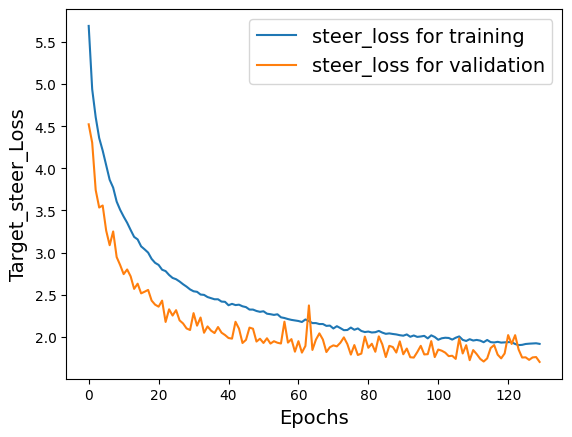

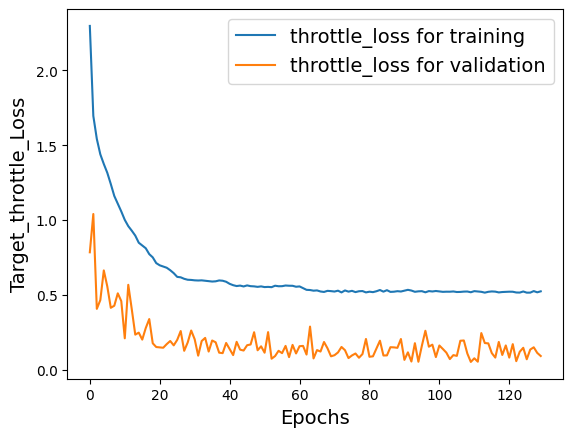

In [14]:
# プログラムの実行
_main()